# View

In [ ]:
import pandas as pd
from nilearn.image import load_img,math_img,threshold_img
from nilearn.glm import threshold_stats_img
from nilearn import plotting
import matplotlib.pyplot as plt

stat_map = load_img(r'/mnt/workdir/DCM/Docs/Mask/DMN/DMN_atlas/DMN_atlas_lps.nii.gz')
bg_img = load_img(r'/mnt/workdir/DCM/Docs/Mask/DMN/DMN_atlas/mni_1mm_t1w_lps.nii.gz')
#stat_map = math_img("np.where(img<0,0,img)", img=stat_map)

#stat_map = threshold_img(
#    stat_map,
#    threshold=2,
#    cluster_threshold=120)

# thresholded_map1, threshold1 = threshold_stats_img(
#     stat_map,
#     alpha=0.001,
#     height_control='fpr',
#     cluster_threshold=800,
#     two_sided=False,
# )

plotting.view_img(stat_map_img=stat_map,bg_img=bg_img,threshold=0,vmax=5,symmetric_cbar=0,black_bg=None,draw_cross=True)
#v.save_as_html(r'/mnt/workdir/DCM/BIDS/derivatives/Nilearn/game1/hexagon_spct/Setall/6fold/group/mean#/zstats_0011_Age_tmap_fpr-0.001.html')
# thresholded_map1.to_filename(r'/mnt/data/DCM/result_backup/2023.3.13/Nilearn/game1/distance_spct/Setall/6fold/group/age_all/M2_corrxdistance_Age_tmap_thr.nii.gz')

# RSA-HP

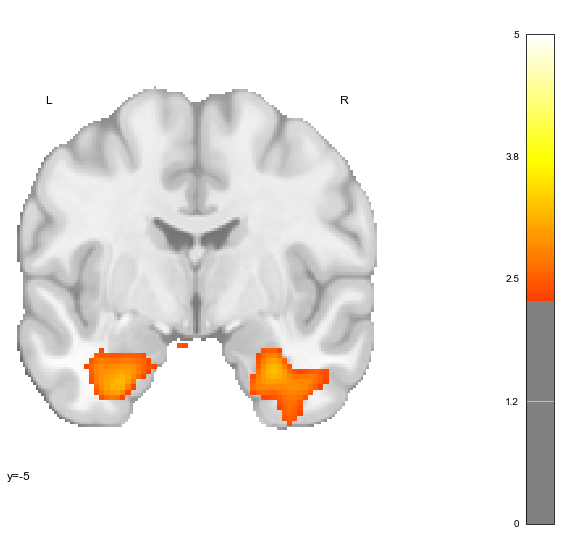

In [2]:
from nilearn.plotting import plot_stat_map
from nilearn.image import load_img, math_img, threshold_img
import matplotlib.pyplot as plt

fig,ax = plt.subplots(figsize=[10,10])
bg_img = load_img(r'/mnt/data/Template/tpl-MNI152NLin2009cAsym/tpl-MNI152NLin2009cAsym_res-01_desc-brain_T1w.nii.gz')
# bg_img = load_img(r'/mnt/data/DCM/tmp/mni152.nii.gz')
stat_map = load_img(r'/mnt/data/DCM/result_backup/2023.5.14/Nilearn/game1/cv_test_hexagon_spct/Setall/6fold/group_203/hp_all/thr_alignPhi_even_zmap.nii.gz')
#stat_map = math_img("np.where(img<0,0,img)", img=stat_map)

#stat_map = threshold_img(
#    stat_map,
#    threshold=2.3,
#    cluster_threshold=30)

plot_stat_map(stat_map_img=stat_map,bg_img=bg_img,cut_coords=[-5],threshold=2.3,vmax=5,display_mode='y',black_bg=0,figure=fig,axes=ax)

# plot_stat_map(stat_map_img=stat_map,bg_img=bg_img,cut_coords=[-8],threshold=2.3,vmax=5,symmetric_cbar=0,display_mode='y',black_bg=0,figure=fig,axes=ax[1],colorbar=True)
#plot_stat_map(stat_map_img=stat_map,bg_img=bg_img,cut_coords=[6],threshold=2.3,vmax=5,symmetric_cbar=1,display_mode='y',black_bg=0,#figure=fig,axes=ax[4])

# plt.savefig(r"/mnt/data/DCM/result_backup/2023.5.14/Nilearn/game1/cv_test_hexagon_spct/Setall/6fold/group_203/hp_all/thr_alignPhi_even_zmap_new.svg",bbox_inches='tight',pad_inches=0,dpi=300)

In [ ]:
# distance whole brain
from nilearn.plotting import plot_stat_map
from nilearn.image import load_img, math_img, threshold_img
import matplotlib.pyplot as plt

fig,ax = plt.subplots(figsize=[10,7])
stat_map = load_img(r'/mnt/data/DCM/result_backup/2022.12.28/distance/Setall/6fold/group/hp-adult/2ndLevel/_contrast_id_con_0005/spmT_0001_thr.nii')
#stat_map = math_img("np.where(img<0,0,img)", img=stat_map)

#stat_map = threshold_img(
#    stat_map,
#    threshold=2.3,
#    cluster_threshold=30)

plot_stat_map(stat_map_img=stat_map,bg_img=bg_img,cut_coords=[-2],threshold=2.3,vmax=5,symmetric_cbar=0,display_mode='x',black_bg=0,figure=fig,axes=ax,colorbar=True)
#plot_stat_map(stat_map_img=stat_map,bg_img=bg_img,cut_coords=[-8],threshold=2.3,vmax=5,symmetric_cbar=0,display_mode='y',
#black_bg=0,figure=fig,axes=ax[1],colorbar=True)
#plot_stat_map(stat_map_img=stat_map,bg_img=bg_img,cut_coords=[6],threshold=2.3,vmax=5,symmetric_cbar=1,display_mode='y',black_bg=0,#figure=fig,axes=ax[4])
plt.savefig(r"/mnt/workdir/DCM/result/game1/RSA/game1-distance_subject-hp2.svg",bbox_inches='tight',pad_inches=0,dpi=300)

In [ ]:
# RSA-covariate-acc
from nilearn.plotting import plot_stat_map
from nilearn.image import load_img, math_img, threshold_img
import matplotlib.pyplot as plt

fig,ax = plt.subplots(1,3,figsize=[20,7])
stat_map = load_img(r'/mnt/data/DCM/result_backup/2022.11.27/game1/separate_hexagon_2phases_correct_trials/Setall/6fold/group/covariates/age/2ndLevel/_contrast_id_ZF_0011/spmT_0002.nii')
bg_img = load_img(r'/mnt/data/Template/tpl-MNI152NLin2009cAsym/tpl-MNI152NLin2009cAsym_res-01_desc-brain_T1w.nii.gz')
#stat_map = math_img("np.where(img<0,0,img)", img=stat_map)

stat_map = threshold_img(
    stat_map,
    threshold=2.3,
    cluster_threshold=72)

plot_stat_map(stat_map_img=stat_map,bg_img=bg_img,cut_coords=[-10],threshold=2.3,vmax=5,symmetric_cbar=0,display_mode='x',black_bg=0,figure=fig,axes=ax[0],colorbar=False)
stat_map = math_img("np.where(img<0,0,img)", img=stat_map)
plot_stat_map(stat_map_img=stat_map,bg_img=bg_img,cut_coords=[-12],threshold=2.3,vmax=5,symmetric_cbar=0,display_mode='y',black_bg=0,figure=fig,axes=ax[1],colorbar=False)
plot_stat_map(stat_map_img=stat_map,bg_img=bg_img,cut_coords=[-18],threshold=2.3,vmax=5,symmetric_cbar=0,display_mode='z',black_bg=0,figure=fig,axes=ax[2],colorbar=True)
plt.savefig(r"/mnt/workdir/DCM/result/game1/RSA/game1-F-test_subject-all_covariate-age.svg",bbox_inches='tight',pad_inches=0,dpi=300)

In [ ]:
from nilearn.glm import threshold_stats_img
from nilearn.image import load_img
stat_map = load_img(r'/mnt/workdir/DCM/BIDS/derivatives/Nipype/game1/separate_hexagon/Setall/group/covariates/acc/2ndLevel/_contrast_id_ZF_0006/spmT_0002.nii')
#zmap = zscore_img(stat_map)
thresholded_map2, threshold2 = threshold_stats_img(stat_map, alpha=0.05, height_control='fdr')
print('The FDR=.05 threshold is %.3g' % threshold2)

In [ ]:
stat_map.get_fdata().max()

# Mean_zmap of two data set

In [24]:
import pandas as pd
from nilearn.image import load_img,math_img
from nilearn.plotting import view_img

stat_map = load_img(r'/mnt/workdir/DCM/BIDS/derivatives/Nipype/game1/separate_hexagon/Setall/group/covariates/acc/2ndLevel/_contrast_id_ZF_0006/spmT_0002.nii')
bg_img = load_img(r'/mnt/data/Template/tpl-MNI152NLin2009cAsym/tpl-MNI152NLin2009cAsym_res-01_desc-brain_T1w.nii.gz')
#stat_map = math_img("np.where(img<0,0,img)", img=stat_map)
view_img(stat_map_img=stat_map,bg_img=bg_img,threshold=2.3,symmetric_cbar=0,black_bg=None)

ValueError: File not found: '/mnt/workdir/DCM/BIDS/derivatives/Nipype/game1/separate_hexagon/Setall/group/covariates/acc/2ndLevel/_contrast_id_ZF_0006/spmT_0002.nii'

In [ ]:
from nilearn.image import mean_img
zmaps = [r'D:\Project\Development cognitive map\Result\defROI\set1\hp\2ndLevel\_contrast_id_ZF_0011/ZT_0001.nii',
         r'D:\Project\Development cognitive map\Result\defROI\set2\hp\2ndLevel\_contrast_id_ZF_0011/ZT_0001.nii']
mean_zmap = mean_img(zmaps)
mean_zmap_path = r'D:\Project\Development cognitive map\Result\defROI/mean_zmap_3.nii.gz'
mean_zmap.to_filename(mean_zmap_path)

In [23]:
import os
import numpy as np
from nilearn.image import load_img,math_img,new_img_like
from  nilearn.masking import apply_mask

def zscore_nii(source_dir,file,prefix):
    filepath = os.path.join(source_dir,file)
    mask = load_img(r'D:\Project\Common\Template\tpl-MNI152NLin2009cAsym\tpl-MNI152NLin2009cAsym_res-02_desc-brain_mask.nii.gz')
    #mask = load_img(r'/mnt/data/Template/tpl-MNI152NLin6Asym/tpl-MNI152NLin6Asym_res-02_desc-brain_mask.nii.gz')
    fmap = load_img(filepath)
    
    fmap_mean = apply_mask(fmap, mask).mean()
    fmap_std = apply_mask(fmap, mask).std()
    fmap_zscore = math_img("(img- {})/{}".format(fmap_mean,fmap_std),img=fmap)
    
    fmap_data = fmap_zscore.get_fdata()
    mask_data = mask.get_fdata()
    fmap_data[mask_data == 0] = np.float64('NaN')
    map_zscore = new_img_like(fmap_zscore, fmap_data)
    map_zscore.to_filename(os.path.join(source_dir,prefix+file[3:]))

zscore_nii(r'D:\Project\Development cognitive map\Result\defROI\set1\hp\2ndLevel\_contrast_id_ZF_0011','spmT_0001.nii','Z')

ValueError: File not found: 'D:\Project\Common\Template\tpl-MNI152NLin2009cAsym\tpl-MNI152NLin2009cAsym_res-02_desc-brain_mask.nii.gz'

In [3]:
import numpy as np
from nilearn import surface
from nilearn import datasets
fsaverage = datasets.fetch_surf_fsaverage()

ec = surface.load_surf_data('/mnt/workdir/DCM/Docs/Mask/lh.fsaverage.EC.mgh')

view = plotting.view_surf(fsaverage.infl_right, ec,
                          bg_map=fsaverage.sulc_right)

# In a Jupyter notebook, if ``view`` is the output of a cell, it will
# be displayed below the cell

ValueError: The input type is not recognized. '/mnt/workdir/DCM/Docs/Mask/lh.fsaverage.EC.mgh' was given while valid inputs are a Numpy array or one of the following file formats: '.gii', '.gii.gz', '.mgz', '.nii', '.nii', Freesurfer specific files such as '.area', '.curv', '.sulc', '.thickness', '.label', '.an'.

In [7]:
import os
from surfer import Brain

print(__doc__)

subject_id = "fsaverage"
hemi = "lh"
surf = "smoothwm"
brain = Brain(subject_id, hemi, surf)

# If the label lives in the normal place in the subjects directory,
# you can plot it by just using the name
brain.add_label("/mnt/workdir/DCM/Docs/Mask/lh.fsaverage.EC.mgh")
brain.show_view(dict(azimuth=-42, elevation=105, distance=225,
                     focalpoint=[0, 20, 15]))

Automatically created module for IPython interactive environment


UnicodeDecodeError: 'utf-8' codec can't decode byte 0x80 in position 6: invalid start byte